## Table of Content

- [Imports](#Imports)
- [Data Gathering](#Data-Gathering)
- [Data Assessment](#Data-Assessment)
- [Data Cleaning](#Data-Cleaning)
- [Storing Data](#Storing-Data)
- [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)
- [Insights](#Insights)

# Imports

In [1]:
import requests
import tweepy
import pandas as pd
import json
import os
from more_itertools import chunked
import glob
import re
import matplotlib.pyplot as plt

# Data Gathering

### Downloading the image predictions tsv file

In [2]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

# Checking to make sure the file has not already been downloaded in a previous session
if not os.path.isfile('image-predictions.tsv'):
    response = requests.get(image_prediction_url, 'lxml')
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response.content)

### Downloading the twitter archive enhanced csv file if it is not uploaded to the working directory already

In [3]:
twitter_archive_enhanced_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Checking to make sure the file has not already been downloaded in a previous session
if not os.path.isfile('twitter-archive-enhanced.csv'):
    response = requests.get(twitter-archive-enhanced_url, 'lxml')
    with open('twitter-archive-enhanced.csv', 'w') as file:
        file.write(response.content)

In [4]:
# Reading the 2 files into dataframes

archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Reading in my Twitter Developer keys from a text file

In [5]:
keys = {}
try:
    with open('Keys.txt') as file:
        for line in file.readlines():
            key = line.rstrip().split(',')
            keys[key[0]] = key[1]
except:
    pass
        
keys.keys()

dict_keys(['Key', 'Secret', 'Token', 'Access_Token', 'Access_Secret'])

### Creating the Twitter API object

In [6]:
consumer_key = keys['Key']
consumer_secret = keys['Secret']
access_token = keys['Access_Token']
access_secret = keys['Access_Secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### Querying the Twitter API and saving the responses into .json files

In [7]:
dataset_length = len(archive_enhanced)
folder = 'archive_enhanced'

try:
    os.makedirs(folder)

    for batch in chunked(range(dataset_length), 100):
        tweet_ids = list(archive_enhanced.tweet_id[batch])
        batch_lookup = api.lookup_statuses(tweet_ids)

        for tweet in batch_lookup:
            with open(os.path.join(folder, tweet.id_str+'.json'), 'w') as file:
                file.write(json.dumps(tweet._json))
except:
    pass

### Loading the saved .json files, extracting the tweet's id, number of likes and retweets, and saving it all in a single text file

In [8]:
# Creating the txt file if it has not already been created in a previous session

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as txt_file:

        for tweet_file in glob.glob(folder + '/*.json' ):
            with open(tweet_file) as file:
                tweet_data = json.load(file)
                tweet_id = int(tweet_data['id'])
                tweet_retweet_count = int(tweet_data['retweet_count'])
                tweet_fav_count = int(tweet_data['favorite_count'])
                txt_file.write(f'{tweet_id} {tweet_retweet_count} {tweet_fav_count}\n')

### Converting the text file to a pandas dataframe

In [9]:
data_list = []

with open('tweet_json.txt') as txt_file:
    for line in txt_file.readlines():
        data = line.split(' ')
        data = [int(x) for x in data]
        data_list.append(data)
        
tweet_json = pd.DataFrame(data_list, columns = ['tweet_id', 'retweet_count', 'fav_count'])
tweet_json.head()

,tweet_id,retweet_count,fav_count
0,666020888022790149,423,2293
1,666029285002620928,39,112
2,666033412701032449,36,100
3,666044226329800704,115,247
4,666049248165822465,37,89


[back to top](#Table-of-Content)

# Data Assessment

### Visual Assessments

**archive_enhanced table**

In [10]:
archive_enhanced.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
470,816816676327063552,NaN,NaN,2017-01-05 01:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timber. He misses Christmas. Specifica...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816816676...,12,10,Timber,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1943,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,12,10,None,None,None,None,None
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moe. He's a fetty woof. Got a cardboar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812372279...,13,10,Moe,None,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,None,None,None,None
1269,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vince. He's a Gregorian Flapjeck. Whit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,None,None,None,None
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
2115,670428280563085312,NaN,NaN,2015-11-28 02:25:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None


In [11]:
archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Issues Noted**
- The values in the source column are not properly formatted because they are still surrounded by html tags
- Some of the tweets are replies to or retweets of previous tweets
- doggo, floofer, pupper and puppo columns all represent different values of a single variable, the dog stage
- expanded_url column contains links to Twitter and non-Twitter pages, e.g https://vine.co/v/iiLjKuYJpr6


**image_predictions table**

In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
680,683773439333797890,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,1,miniature_pinscher,0.072885,True,Labrador_retriever,0.057866,True,schipperke,0.053257,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True


**Issues Noted**
- prediction values are completely lowercase for some while others are titlecase in the imaage_predictions dataframe

**tweet_json table**

In [14]:
tweet_json.head()

,tweet_id,retweet_count,fav_count
0,666020888022790149,423,2293
1,666029285002620928,39,112
2,666033412701032449,36,100
3,666044226329800704,115,247
4,666049248165822465,37,89


In [15]:
tweet_json.sample(20)

,tweet_id,retweet_count,fav_count
477,675047298674663426,275,929
1008,704480331685040129,983,3153
876,693590843962331137,1785,4669
1775,801538201127157760,1953,7820
1231,730427201120833536,941,3208
1944,824775126675836928,3278,14068
77,667435689202614272,76,266
1595,778990705243029504,6660,18758
1050,707411934438625280,546,2120
1171,718939241951195136,1587,4814


**Issues Noted**
- The tweet_json variables should be part of the archive_enhanced table

### Programmatic Assessment

**archive_enhanced table**

In [16]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Issues Noted**
- Erroneous datatype for timestamp column
- Erroneous datatype for retweeted_status_timestamp column

In [17]:
# Checking for presence of duplicate values
archive_enhanced.tweet_id.duplicated().sum()

0

In [18]:
archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# Checking the records with abnormal rating_denominator values
archive_enhanced.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
for i, txt in enumerate(archive_enhanced.query('rating_denominator != 10')['text'].values):
    print(i, '--->', txt)

0 ---> @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
1 ---> @docmisterio account started on 11/15/15
2 ---> The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
3 ---> Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
4 ---> RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
5 ---> Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
6 ---> After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
7 ---> Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
8 ---> Happy 4/20 from the squad! 13/10 for all https

In [21]:
archive_enhanced.query('rating_numerator >100')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [22]:
for i, txt in enumerate(archive_enhanced.query('rating_numerator >100')['text'].values):
    print(i, '--->', txt)

0 ---> @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
1 ---> @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
2 ---> @markhoppus 182/10
3 ---> @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
4 ---> Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
5 ---> This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
6 ---> Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
7 ---> Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
8 ---> Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
9 ---> IT'S PUPPERGEDDON. Total of 144/120 ...I th

**Issues Noted**
- Incorrect rating_numerator and rating_denominator values extracted from text in some records, e.g, value of 0 in rating_denominator column

**image_predictions table**

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False


**Issues Noted**
- Missing or incomplete data: Length of image_predictions dataframe is not equal to length of the archive_enhanced dataframe

**tweet_json table**

In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   fav_count      2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [26]:
# Number of tweets that were not retrieved
len(archive_enhanced) - len(tweet_json)

29

In [27]:
# Attempting to retrieve the missing tweet data again from the Twitter API
missing_tweet_ids = set(archive_enhanced.tweet_id.values).difference(set(tweet_json.tweet_id.values))

missing_tweets = api.lookup_statuses(list(missing_tweet_ids))

In [28]:
missing_tweets

[]

**Issues Noted**
- Missing or incompletedata: number of retrieved tweets less than number of tweet ids in archive_enhanced

### Collated Issues

#### Quality Issues

*archive_enhanced table*
- The values in the source column are not properly formatted because they are still surrounded by html tags  
- expanded_url column contains links to Twitter and non-Twitter pages, e.g https://vine.co/v/iiLjKuYJpr  
- Some of the tweets are not original tweets, but retweets of other tweets  
- After resolving #3, retweeted_status_id, retweeted_user_id and retweeted_status_timestamp columns now contain nan values only
- Erroneous datatype for timestamp column
- Incorrect rating_numerator and rating_denominator values extracted from text in some records, e.g, value of 0 in rating_denominator column
- NA values in retweet_count and fav_count columns of the table after it is merged with the tweet_json table

*image_predictions table*  
- prediction values are completely lowercase for some while others are titlecase  
- Inconsistent records between the archive_enhanced and image_predictions tables  

#### Tidiness Issues

*archive_enhanced table*  
- doggo, floofer, pupper and puppo columns all represent different values of a single variable, the dog stage  

*tweet_json table*  
- The tweet_json variables should be part of the archive_enhanced table



[back to top](#Table-of-Content)

# Data Cleaning

In [29]:
# Making copies of the datasets
archive_enhanced_clean = archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

## Cleaning Tidiness Issues

### Issue #1: doggo, floofer, pupper and puppo columns of the archive_enhanced table all represent different values of a single variable, the dog stage 

#### Define: 
*Melt the rows into one, making sure rows where all values are none is represented as None*
#### Code

In [30]:
archive_enhanced_clean['dog_stage'] = pd.Series([None for row in archive_enhanced_clean.index])

for row in archive_enhanced_clean.index:
    row_var = archive_enhanced_clean.loc[row, ['doggo', 'floofer', 'pupper', 'puppo']]
    stage = ['doggo', 'floofer', 'pupper', 'puppo']
    for var in row_var:
        if var in stage:
            archive_enhanced_clean.loc[row, 'dog_stage'] = var

archive_enhanced_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [31]:
archive_enhanced_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1437,697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256...,10,10,Oakley,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,pupper
2189,668967877119254528,6.689207e+17,21435658.0,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None
621,796116448414461957,NaN,NaN,2016-11-08 22:25:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't believe it at first but now I can see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796116448...,11,10,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,pupper
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None


### Issue #2: The tweet_json variables should be part of the archive_enhanced table

#### Define: 
*Merge the tweet_json_clean dataframe with archive_enhanced_clean using pandas merge function*
#### Code

In [32]:
archive_enhanced_clean = pd.merge(archive_enhanced_clean, tweet_json_clean, how = 'left', on = 'tweet_id')

#### Test

In [33]:
archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7009.0,33810.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5302.0,29330.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3481.0,22054.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7226.0,36943.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7761.0,35310.0


## Cleaning Quality Issues

### Issue #1: NA values in retweet_count and fav_count columns of the table after it is merged with the tweet_json table

In [34]:
archive_enhanced_clean.retweet_count.isnull().sum()

29

#### Define: 
*Drop rows with NA values in these columns*
#### Code

In [35]:
archive_enhanced_clean = archive_enhanced_clean[~ archive_enhanced_clean.retweet_count.isnull()]
archive_enhanced_clean.reset_index(drop=True, inplace = True)

#### Test

In [36]:
archive_enhanced_clean.retweet_count.isnull().sum()

0

### Issue #2: The values in the source column are not properly formatted because they are still surrounded by html tags

In [37]:
for link in archive_enhanced_clean.source.sample(5):
    print(link)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


#### Define: 
*Use string slicing to retrieve the text between the tags*
#### Code

In [38]:
def source_slicer(x):
    slice1 = str(x)[:-4]
    return slice1.split('>')[1]

archive_enhanced_clean.source = archive_enhanced_clean.source.apply(source_slicer)

#### Test

In [39]:
archive_enhanced_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #3: expanded_url column contains links to Twitter and non-Twitter pages, e.g https://vine.co/v/iiLjKuYJpr

In [40]:
for link in archive_enhanced_clean.expanded_urls.sample(10):
    print(link)

https://twitter.com/dog_rates/status/667174963120574464/photo/1
https://twitter.com/dog_rates/status/678410210315247616/photo/1
https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1
https://twitter.com/dog_rates/status/862831371563274240/photo/1,https://twitter.com/dog_rates/status/862831371563274240/photo/1
https://twitter.com/dog_rates/status/748977405889503236/photo/1
https://twitter.com/dog_rates/status/667866724293877760/photo/1
https://twitter.com/dog_rates/status/809448704142938112/photo/1
https://m.youtube.com/watch?v=idKxCMsS3FQ&feature=youtu.be
https://twitter.com/dog_rates/status/709449600415961088/photo/1,https://twitter.com/dog_rates/status/709449600415961088/photo/1
https://twitter.com/dog_rates/status/674063288070742018/photo/1


#### Define: 
*Replace the non-Twitter urls with the Twitter version by joining the  https://twitter.com/dog_rates/status/ to the tweet_id*
#### Code

In [41]:
def expanded_url_generator(x:int):
    """
    x: tweet_id in question 
    """
    return 'https://twitter.com/dog_rates/status/' + str(x)

archive_enhanced_clean.expanded_urls = archive_enhanced_clean.tweet_id.apply(expanded_url_generator)

#### Test

In [42]:
for link in archive_enhanced_clean.expanded_urls.sample(10):
    print(link)

https://twitter.com/dog_rates/status/879130579576475649
https://twitter.com/dog_rates/status/684097758874210310
https://twitter.com/dog_rates/status/823719002937630720
https://twitter.com/dog_rates/status/725842289046749185
https://twitter.com/dog_rates/status/666082916733198337
https://twitter.com/dog_rates/status/785927819176054784
https://twitter.com/dog_rates/status/666063827256086533
https://twitter.com/dog_rates/status/709918798883774466
https://twitter.com/dog_rates/status/827600520311402496
https://twitter.com/dog_rates/status/794355576146903043


### Issue #4: Some of the tweets in the archive_enhanced dataframe are not original tweets, but retweets of other tweets

*From the project's specifications, we only want original ratings (no retweets) that have images.*  
In solving this issue, I will be ensuring that only original tweets remain in the dataframe. Making sure these tweets have images will be solved under a later issue.

In [43]:
archive_enhanced_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
1396,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,Twitter for iPhone,This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,None,1175.0,3020.0
1014,743895849529389061,NaN,NaN,2016-06-17 19:59:26 +0000,Twitter for iPhone,When you're given AUX cord privileges from the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743895849...,10,10,None,None,881.0,3407.0
1700,679862121895714818,NaN,NaN,2015-12-24 03:12:15 +0000,Twitter for iPhone,"""Dammit hooman I'm jus trynna lik the fler"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/679862121...,11,10,None,None,557.0,2254.0
1412,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,Twitter for iPhone,Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,1631.0,4456.0
1664,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,Twitter for iPhone,This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,1627.0,3604.0
1853,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09 +0000,Twitter for iPhone,Ok last one of these. I may try to make some m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674999807...,13,10,None,None,957.0,1995.0
1438,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,Vine - Make a Scene,It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694342028...,11,10,None,None,432.0,1465.0
1926,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,308.0,995.0
1843,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,Twitter for iPhone,This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,257.0,1055.0
873,758740312047005698,NaN,NaN,2016-07-28 19:06:01 +0000,Twitter for iPhone,Meet Boston. He's worried because his tongue w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758740312...,12,10,Boston,None,1500.0,5384.0


#### Define: 
*Drop records that have a non-NAN value for retweeted_status_id*
#### Code

In [44]:
archive_enhanced_clean = archive_enhanced_clean[archive_enhanced_clean.retweeted_status_id.isnull()]
archive_enhanced_clean.reset_index(drop=True, inplace = True)

#### Test

In [45]:
archive_enhanced_clean.retweeted_status_id.unique()

array([nan])

### Issue #5: After resolving #3, retweeted_status_id, retweeted_user_id and retweeted_status_timestamp columns now contain nan values only

#### Define: 
*Drop the affected columns using the pandas drop function*
#### Code

In [46]:
archive_enhanced_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                            inplace = True)

#### Test

In [47]:
archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7009.0,33810.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5302.0,29330.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3481.0,22054.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7226.0,36943.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7761.0,35310.0


### Issue #6: Erroneous datatype for timestamp column

*The timestamp column is currently of type object, whereas it should be a datetime object*

#### Define: 
*Convert the timestamp column to Timestamp object using the pandas.to_datetime function*
#### Code

In [48]:
archive_enhanced_clean.timestamp = archive_enhanced_clean.timestamp.apply(pd.to_datetime)

#### Test

In [49]:
archive_enhanced_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2167 entries, 0 to 2166
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2167 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 17.1 KB


### Issue #7: Incorrect rating_numerator and rating_denominator values extracted from text in some records, e.g, value of 0 in rating_denominator column

#### Define: 
*Use new regex patterns to extract rating_numerator and rating_denominator values from the text column*
#### Code

In [50]:
def numerator(x):
    matches = re.findall('(\d+/\d+)', x)
    return int(matches[-1].split('/')[0])

def denominator(x):
    matches = re.findall('(\d+/\d+)', x)
    return int(matches[-1].split('/')[1])

In [51]:
archive_enhanced_clean.rating_numerator = archive_enhanced_clean.text.apply(numerator)
archive_enhanced_clean.rating_denominator = archive_enhanced_clean.text.apply(denominator)

#### Test

In [52]:
archive_enhanced_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,fav_count
count,2.167000e+03,7.800000e+01,7.800000e+01,2167.000000,2167.000000,2167.000000,2167.000000
mean,7.369083e+17,7.455079e+17,2.014171e+16,12.760498,10.479003,2236.744808,7575.810337
std,6.742548e+16,7.582492e+16,1.252797e+17,43.261091,6.971542,3984.257948,11186.203165
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,7.000000,1.000000,45.000000
25%,6.768157e+17,6.757419e+17,3.086374e+08,10.000000,10.000000,477.000000,1602.500000
50%,7.095192e+17,7.038708e+17,4.196984e+09,11.000000,10.000000,1059.000000,3407.000000
75%,7.892032e+17,8.257804e+17,4.196984e+09,12.000000,10.000000,2551.000000,9395.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000,70747.000000,144902.000000


### Issue #8: prediction values are completely lowercase for some while others are titlecase

In [53]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define: 
*convert everything to lowercase for uniformity and consistency*
#### Code

In [54]:
for column in ['p1', 'p2', 'p3']:
    image_predictions_clean[column] = image_predictions_clean[column].apply(lambda x: str(x).lower())

#### Test

In [55]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #9: Inconsistent records between the archive_enhanced and image_predictions tables

Some of the tweet_ids that were not original tweets can still be found in the image_predictions table.  
    Likewise, some tweet_ids in the archive_enhanced table are not present in the image_predictions table, probably because they do not contain images.

In [56]:
print(f'archive_enhanced_clean length: {len(archive_enhanced_clean)}')
print(f'image_predictions_clean length: {len(image_predictions_clean)}')

archive_enhanced_clean length: 2167
image_predictions_clean length: 2075


#### Define: 
*Drop records with tweet_ids that are not common in both tables*
#### Code

In [57]:
archive_enhanced_clean = archive_enhanced_clean.query('tweet_id in @image_predictions_clean.tweet_id.values')
archive_enhanced_clean.reset_index(drop = True, inplace = True)

image_predictions_clean = image_predictions_clean.query('tweet_id in @archive_enhanced_clean.tweet_id.values')
image_predictions_clean.reset_index(drop = True, inplace = True)

#### Test

In [58]:
print(f'archive_enhanced_clean length: {len(archive_enhanced_clean)}')
print(f'image_predictions_clean length: {len(image_predictions_clean)}')

archive_enhanced_clean length: 1986
image_predictions_clean length: 1986


In [59]:
set(archive_enhanced_clean.tweet_id.values).difference(set(image_predictions_clean.tweet_id.values))

set()

[back to top](#Table-of-Content)

# Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
archive_enhanced_clean.to_csv('twitter_archive_master.csv', index = False)

In [61]:
image_predictions_clean.to_csv('image_archive_master', index = False)

# Analyzing and Visualizing Data

In [62]:
print(archive_enhanced_clean.shape)
archive_enhanced_clean

(1986, 13)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7009.0,33810.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5302.0,29330.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3481.0,22054.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7226.0,36943.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7761.0,35310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,37.0,89.0
1982,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,115.0,247.0
1983,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,36.0,100.0
1984,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,39.0,112.0


In [63]:
archive_enhanced_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,fav_count
count,1.986000e+03,2.300000e+01,2.300000e+01,1986.000000,1986.000000,1986.000000,1986.000000
mean,7.356142e+17,6.978112e+17,4.196984e+09,12.259819,10.512085,2244.082075,7710.831823
std,6.740686e+16,4.359384e+16,0.000000e+00,41.573363,7.276068,4019.683865,11375.953776
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,7.000000,11.000000,66.000000
25%,6.758214e+17,6.732411e+17,4.196984e+09,10.000000,10.000000,495.250000,1636.750000
50%,7.082494e+17,6.757073e+17,4.196984e+09,11.000000,10.000000,1080.000000,3464.500000
75%,7.873791e+17,7.031489e+17,4.196984e+09,12.000000,10.000000,2559.250000,9557.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,170.000000,70747.000000,144902.000000


C:\ProgramData\Anaconda3\envs\wpt\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4196983835.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\ProgramData\Anaconda3\envs\wpt\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4196983835.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\ProgramData\Anaconda3\envs\wpt\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4196983835.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<Figure size 450x300 with 0 Axes>

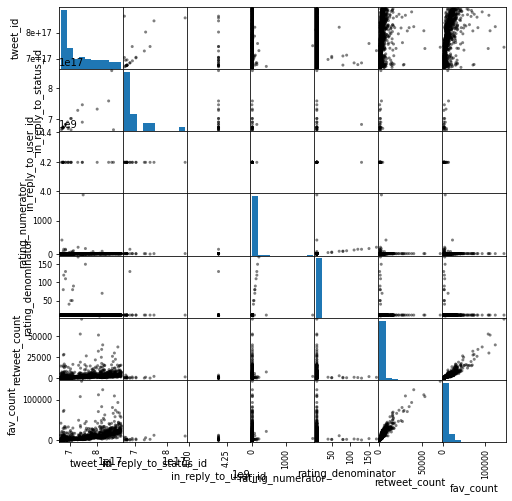

In [64]:
plt.figure(dpi = 75)
pd.plotting.scatter_matrix(archive_enhanced_clean, figsize = (8,8), color = 'k');

In [65]:
print(image_predictions_clean.shape)
image_predictions_clean

(1986, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
1982,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
1983,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1984,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


## Research Questions

Previewing the 2 cleaned datasets, questions that arise include:
<ol>
    <li><b>Retweets</b>
        <ul>
            <li>What was the average number of retweets the WeRateDogs account got per tweet?</li>
            <li>What was their most engaged content in terms of retweets?</li>
            <li>What was their least engaged content in terms of retweets?</li>
            <li>How did the number of retweets they were receiving change with time?</li>
        </ul>    
    </li>
    <li><b>Favourites/Likes</b>
        <ul>
            <li>What was the average number of likes the WeRateDogs account got per tweet?</li>
            <li>What was their most engaged content in terms of likes?</li>
            <li>What was their least engaged content in terms of likes?</li>
            <li>How did the number of likes they were receiving change with time?</li>
        </ul>    
    </li>
    <li>Is there any relationship between the amount of retweets they get and the amount of likes a tweet will eventually get?</li>
    <li><b>Image Prediction</b>
        <ul>
            <li>How often was the first prediction actually a dog breed?</li>
            <li>What is the average confidence level of the model's first prediction?</li>
            <li>Which image predictions had the highest confidence level on average?</li>
        </ul>    
    </li>
</ol>


### Research Question #1: Retweets

In [66]:
# What was the average number of retweets the WeRateDogs account got per tweet?
average_retweets = archive_enhanced_clean.retweet_count.mean()

average_retweets

2244.0820745216515

In [67]:
# What was their most engaged content in terms of retweets?
most_engaged_by_retweet = archive_enhanced_clean.query('retweet_count == retweet_count.max()')
most_engaged_by_retweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
768,744234799360020481,NaN,NaN,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,70747.0,144902.0


In [68]:
# What was their least engaged content in terms of retweets?
least_engaged_by_retweet = archive_enhanced_clean.query('retweet_count == retweet_count.min()')
least_engaged_by_retweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
1969,666102155909144576,NaN,NaN,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,11.0,66.0


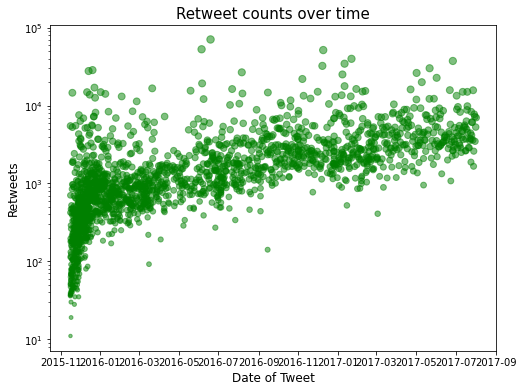

In [69]:
# How did the number of retweets they were receiving change with time?
plt.figure(figsize = (8,6))
plt.scatter(archive_enhanced_clean.timestamp, archive_enhanced_clean.retweet_count, color = 'g', alpha = .5, s = np.log(archive_enhanced_clean.retweet_count)*5)
plt.yscale('log')
plt.xlabel('Date of Tweet', fontsize = 12)
plt.ylabel('Retweets', fontsize = 12)
plt.title('Retweet counts over time', fontsize = 15);

### Research Question #2: Likes

In [70]:
# What was the average number of likes the WeRateDogs account got per tweet?
average_likes = archive_enhanced_clean.fav_count.mean()

average_likes

7710.831822759315

In [71]:
# What was their most engaged content in terms of likes?
most_engaged_by_like = archive_enhanced_clean.query('fav_count == fav_count.max()')
most_engaged_by_like

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
768,744234799360020481,NaN,NaN,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,70747.0,144902.0


In [72]:
# What was their least engaged content in terms of likes?
least_engaged_by_like = archive_enhanced_clean.query('fav_count == fav_count.min()')
least_engaged_by_like

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,fav_count
1969,666102155909144576,NaN,NaN,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,11.0,66.0


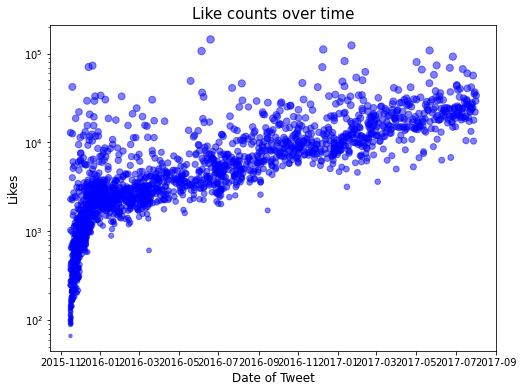

In [73]:
# How did the number of likes they were receiving change with time?
plt.figure(figsize = (8,6))
plt.scatter(archive_enhanced_clean.timestamp, archive_enhanced_clean.fav_count, color = 'blue', alpha = .5, s = np.log(archive_enhanced_clean.retweet_count)*5)
plt.yscale('log')
plt.xlabel('Date of Tweet', fontsize = 12)
plt.ylabel('Likes', fontsize = 12)
plt.title('Like counts over time', fontsize = 15);

### Research Question #3: Is there any relationship between the amount of retweets they get and the amount of likes a tweet will eventually get?

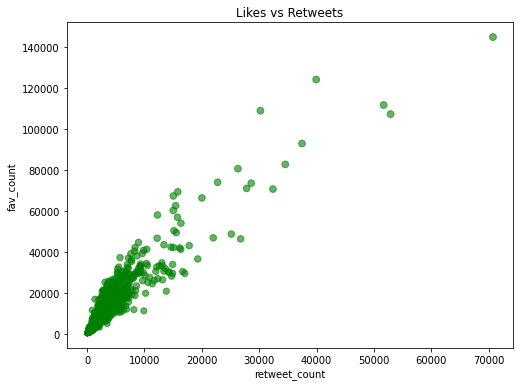

In [74]:
archive_enhanced_clean.plot('retweet_count', 'fav_count', kind = 'scatter', figsize = (8,6), color = 'g',
                           title = 'Likes vs Retweets', alpha = .6, s = 4* np.log(archive_enhanced_clean.fav_count));

### Research Question #4: Image Prediction

In [75]:
# How often was the first prediction a dog breed? 
freq = image_predictions_clean.p1_dog.sum() / len(image_predictions_clean)
freq

0.7396777442094663

In [76]:
# What is the average confidence level of the model's first prediction?
image_predictions_clean.p1_conf.mean()

0.5934522752265862

In [77]:
# Which image predictions had the highest confidence level on average?
conf_levels = image_predictions_clean.groupby('p1').mean()['p1_conf'].sort_values(ascending = False)
conf_levels

p1
ping-pong_ball      0.999945
peacock             0.999924
school_bus          0.999833
bib                 0.998814
slug                0.998075
                      ...   
microphone          0.096063
egyptian_cat        0.090508
desktop_computer    0.086502
wooden_spoon        0.082489
clog                0.081101
Name: p1_conf, Length: 374, dtype: float64

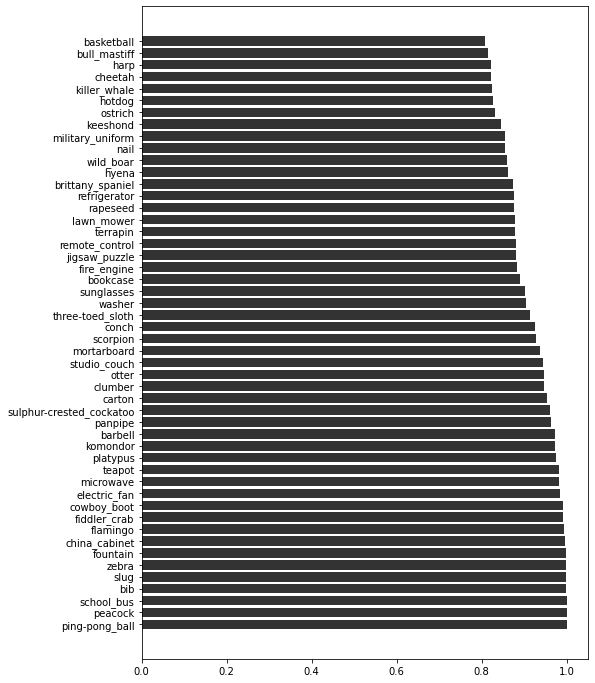

In [78]:
conf_levels = image_predictions_clean.groupby('p1').mean()['p1_conf'].sort_values(ascending = False)
plt.figure(figsize = (8, 12))
plt.barh(conf_levels.index[:50], conf_levels[:50], color = 'k', alpha = .8);

[back to top](#Table-of-Content)

# Insights

<ol>
    <li>On average, the amount of retweets gotten by WeRateDogs tweets increased over time, as seen in the visualization in question #1</li>
    <li>On average, the amount of likes gotten by WeRateDogs tweets increased over time, as seen in the visualization in question #2</li>
    <li>From the visualization produced while investigating question #3, a strong positive correlation exists between the number of retweets and likes a post gets, with posts with a high number of retweet more likely to get a relatively high number of likes, and vice-versa.</li>  
        This is also corroborated by the fact that the most engaged tweet by retweets is also the most liked tweet in this dataset.
    <li>From analysis carried out in question #4, the model predicts the presence of a dog in the pictures 74.1% of the time</li>
    <li>Predictions with the highest average confidence level are not dog  breeds, as seen in question #4 where I attempted to understand which predictions wre having the highest confidence levels in this dataset</li>
</ol>

[back to top](#Table-of-Content)